Nếu cùng sấp hoặc cùng ngửa với người 2 thì người 1 được 1. Ngược lại thì mất 1

Giả sử lợi ích của người chơi 1 được biểu diễn như sau

|  | $S_2\ (y_1)$ | $N_2\ (y_2)$ |
| --- | --- | --- |
| $S_1\ (x_1)$ | 1 | -1 |
| $N_1\ (x_2)$ | -1 | 1 |

Kỳ vọng của người chơi 1 là $E=x^TAy=\begin{bmatrix}
x_1-x_2&
-x_1+x_2
\end{bmatrix}y$

Khi đó lợi ích của người chơi 1 có phần phối xác suất như sau

| P | $y_1$ | $y_2$ |
| --- | --- | --- |
| U | $x_1-x_2$ | $-x_1+x_2$ |

Kỳ vọng lợi ích của người chơi 1: 

$$
E=\sum_{i=1}^2y_i\times U_i
$$

Phương sai của người chơi 1: 

$$
V=\sum_{i=1}^2y_i\times (U_i-E)^2
$$

# Mở đầu

In [11]:
import sys
path = "../Expected values and variance"
sys.path.append(path)

from minh_hoa import Graph

import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[1,-1],[-1,1]])
m = Graph(A,[0.2,0.8])

Mối quan hệ của E và V trên đồ thị

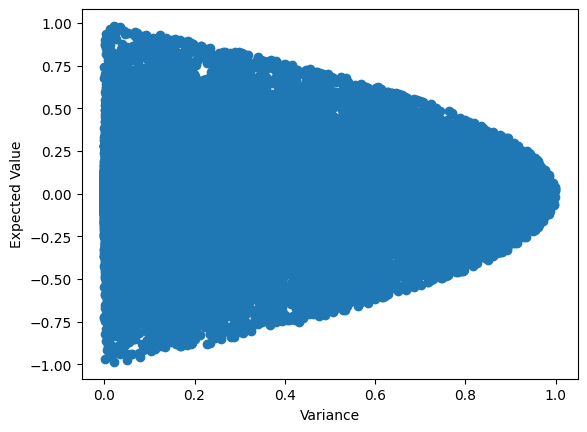

In [3]:
m.relation()

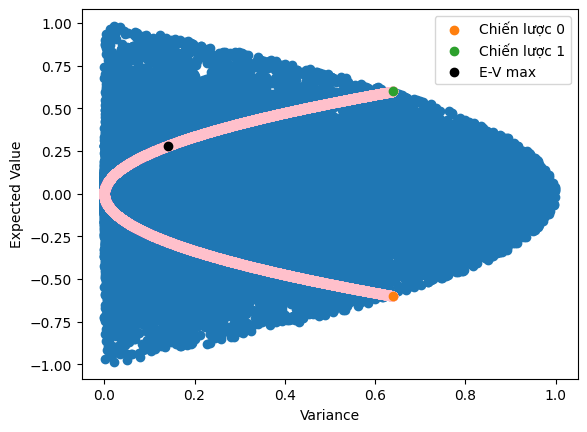

In [4]:
m.relation()
m.curve()

- Người chơi 2 dùng chiến lược [0.2, 0.8], khi đó mối quan hệ giữa kỳ vọng và phương sai của người 1 là đường màu hồng, 
- Dễ thấy từ đồ thị, điểm màu xanh cho kỳ vọng cao nhất nhưng var cũng cao nhất

Khi $p_2=0$ thì ta có đồ thị sau, để có lợi nhuận lớn nhất thì $p_1$=0

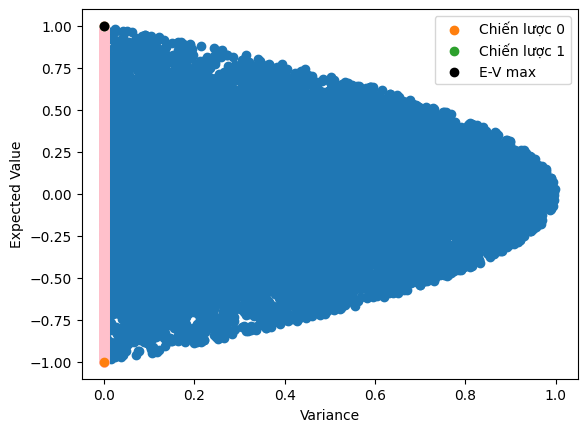

In [5]:
A = np.array([[1,-1],[-1,1]])
m = Graph(A,[0,1])
m.relation()
m.curve()

# Kiểm tra chiến lược

In [6]:
import sys
path = "../Back_test"
sys.path.append(path)

from back_test import Kiem_dinh

In [7]:
payoff1 = [[1,-1],[-1,1]]
payoff2 = [[-1,1],[1,-1]]

m = Graph(payoff1,[0.2,0.8])
m.e_minus_v_values()

'Chiến lược để E-V max là [0.37583146 0.62416854]'

In [8]:
a = [0.37583146, 0.62416854]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Lợi ích thu được được', ylabel='Frequency'>)

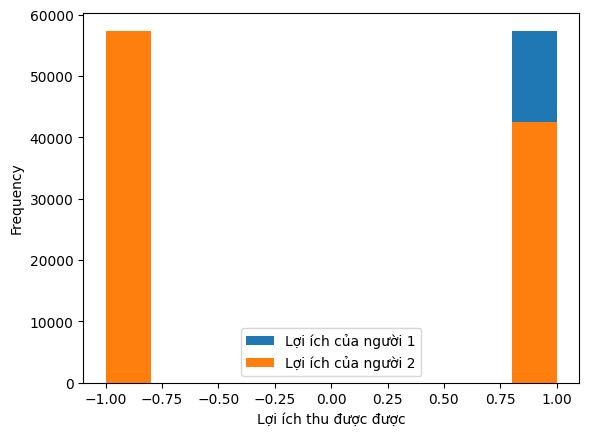

In [9]:
b = [0.2,0.8]
c=Kiem_dinh(so_chien_luoc1=2, so_chien_luoc2=2, payoff1=payoff1, payoff2=payoff2, mix_stra1=a, mix_stra2=b)
c.mat_do_loi_ich()

Khi người 1 chọn chiến lược [0,1] khi [0.2,0.8]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Lợi ích thu được được', ylabel='Frequency'>)

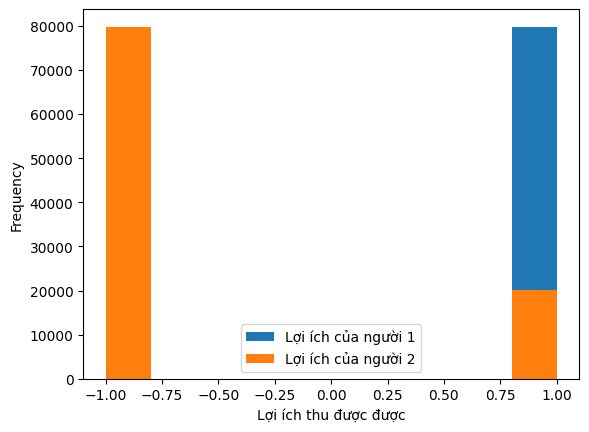

In [10]:
payoff1 = [[1,-1],[-1,1]]
payoff2 = [[-1,1],[1,-1]]
a = [0,1]
b = [0.2,0.8]
c=Kiem_dinh(so_chien_luoc1=2, so_chien_luoc2=2, payoff1=payoff1, payoff2=payoff2, mix_stra1=a, mix_stra2=b)
c.mat_do_loi_ich()

Vậy Lợi ích thu được khi [0,1] là lớn nhất và cũng là chiến lược tối ưu

# Tìm chiến lược tối ưu

In [2]:
import sys
path = "../Find Strategy"
sys.path.append(path)

from q_learning import find_best_strategy
from find_mix_strategy import find_mix_strategy

In [33]:
payoff1 = [[1,-1],[-1,1]]

In [4]:
print(find_mix_strategy([[1,-1],[-1,1]]))

Kỳ vọng của mình: 0.0 
Chiến lược đối thủ: [0.5 0.5 0. ]


In [ ]:
a= find_best_strategy(payoff=payoff1,num_strategy=2,prob_rival=[1/3,2/3])
a.run()

In [36]:
a.show_statistics()

Strategy 0 with k: 497
Strategy 1 with k: 9503
